In [1]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
f = open('hurriyet.txt', 'r', encoding='utf8')
text = f.read()
t_list = text.split('\n')

corpus = []

for cumle in t_list:
    corpus.append(cumle.split())

In [3]:
corpus[1]

['gösterilerde',
 'fitnecilere',
 'ölüm',
 'münafıklara',
 'ölüm',
 'abd',
 'ye',
 'ölüm',
 'ingiltere',
 'ye',
 'ölüm',
 'sloganları',
 'atıldı']

In [4]:
corpus[2]

['dini',
 'lider',
 'ali',
 'hamaney',
 've',
 'cumhurbaşkanı',
 'mahmud',
 'ahmedinejad',
 'ı',
 'destekleyen',
 'iranlılar',
 'son',
 'olaylarda',
 'yeğeni',
 'öldürülen',
 'mir',
 'hüseyin',
 'musevi',
 'başta',
 'olmak',
 'üzere',
 'muhalefet',
 'liderlerini',
 'kınadılar']

In [5]:
corpus[3]

['musevi', 'ye', 'ölüm', 've', 'idam', 'idam', 'sloganları', 'duyuldu']

In [6]:
# KElime vektorleri 100 uzunlugunda
# merkezdeki kelimenin sag ve solunda +5,-5 kelimeye bakiyor
# min_count=5 nadir kelimeleri ele
# sg=1 skip-gram

model = Word2Vec(corpus, size=100, window=5, min_count=5, sg=1)

In [7]:
model.wv['ankara']

array([-0.36462143, -0.38830596,  0.26988643, -0.27215576,  0.2341427 ,
       -0.03362577, -0.48559093,  0.3601364 , -0.30657098, -0.5123659 ,
       -0.47606128,  0.29752094, -0.4137513 , -0.02053691,  0.5544686 ,
        0.4081733 , -0.07683045,  0.43792936, -0.09326597,  0.02479693,
        0.03613878,  0.16529572, -0.04990215,  0.13615526,  0.8868815 ,
        0.43706536, -0.21906143,  0.05642978,  0.15691859, -0.38237095,
        0.32835498, -0.11960306, -0.17681828,  0.04355223, -0.25242493,
       -0.15190363,  0.11589528,  0.01305245, -0.0685661 , -0.2716164 ,
       -0.04361263,  0.23187816, -0.03237191,  0.3261483 ,  0.42832282,
       -0.05474127, -0.33762234,  0.3479393 ,  0.57010955,  0.10724081,
        0.6032939 ,  0.6638579 ,  0.79311275, -0.51720345,  0.12875192,
       -0.03237448, -0.1975702 ,  0.33414656,  0.13749894,  0.52267104,
       -0.13289878, -0.14279938, -0.18851309, -0.25916725, -0.17416865,
       -0.3393732 ,  0.3360576 , -0.5254897 , -0.09546148, -0.13

In [8]:
model.wv.most_similar('youtube')

[('twitter', 0.759550929069519),
 ('facebook', 0.7376952171325684),
 ('paylaşım', 0.7359690070152283),
 ('whatsapp', 0.7221964597702026),
 ('internete', 0.7123515605926514),
 ('twıtter', 0.7069236040115356),
 ('video', 0.7042967081069946),
 ('sayfasına', 0.6863290071487427),
 ('internette', 0.6861578226089478),
 ('site', 0.6856927871704102)]

# Modeli kaydetmek

In [9]:
model.save('word2vec.model')

In [10]:
model = Word2Vec.load('word2vec.model')

In [11]:
def closestwords_tsneplot(model, word):
    word_vectors = np.empty((0,100))
    word_labels = [word]
    
    close_words = model.wv.most_similar(word)
    
    word_vectors = np.append(word_vectors, np.array([model.wv[word]]), axis=0)
    
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors = np.append(word_vectors, np.array([model.wv[w]]), axis=0)
        
    tsne = TSNE(random_state=0)
    Y = tsne.fit_transform(word_vectors)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(5, -2), textcoords='offset points')
        
    plt.show()

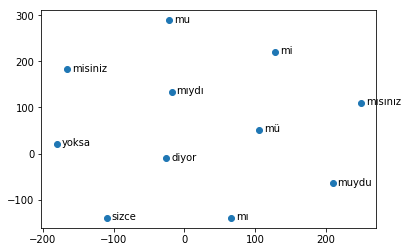

In [12]:
closestwords_tsneplot(model, 'mu')

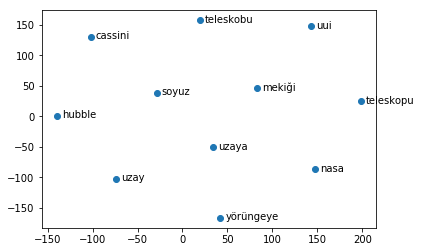

In [13]:
closestwords_tsneplot(model, 'uzay')

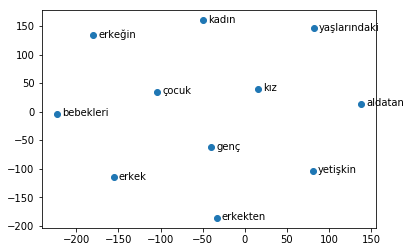

In [14]:
closestwords_tsneplot(model, 'erkek')

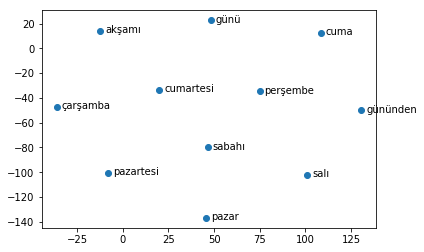

In [15]:
closestwords_tsneplot(model, 'pazartesi')

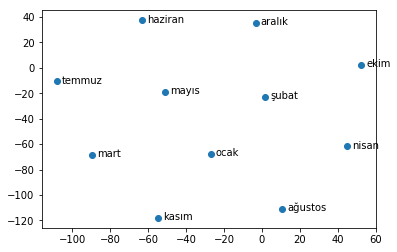

In [16]:
closestwords_tsneplot(model, 'kasım')

In [18]:
model.most_similar(positive=['akşam', 'bugün'], negative=['sabah'], topn=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('yarın', 0.7467525601387024)]

In [19]:
model.most_similar(positive=['akşam', 'sonra'], negative=['sabah'], topn=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('önce', 0.7487465739250183)]

In [21]:
model.most_similar(positive=['anne', 'baba'], negative=['kadın'], topn=5)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('annesi', 0.638787567615509),
 ('babası', 0.6345763206481934),
 ('babasını', 0.6200233101844788),
 ('ablası', 0.6090593338012695),
 ('eşim', 0.5984176397323608)]

In [22]:
model.most_similar(positive=['iyi', 'suçlu'], negative=['kötü'], topn=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('suçsuz', 0.5845060348510742)]